### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import dask.dataframe as dd
from utils import load_parquets, info_sum_isna
from scipy.stats import ranksums
from scipy import stats

# Carregando os dados

### Dataset information:



In [124]:
year = 2020
path = f'../datasets/integrated_datas_{year}.parquet.gzip'
data = dd.read_parquet(path, ignore_metadata_file=True)

Testando se veio de uma distribuicao normal

In [125]:
# testing_normal_distribution(mulher_math_pb, 'NU_NOTA_MT')

In [126]:
# testing_normal_distribution(homem_math_pb, 'NU_NOTA_MT')

Testing normal distribution for math grades (male and female) for all Brazilian states to decide which statistical test would be suitable

In [127]:
# def ploting_distribution_female_male_per_state(state, course):
#     dataset_women = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
#     dataset_man = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
#     fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#     ax1 = sns.histplot(dataset_women[course], ax=ax1).set(title="Math grades distribution 'W'", xlabel='Math grades W', ylabel='density')
#     ax2 = sns.histplot(dataset_man[course], ax=ax2).set(title="Math grades distribution 'M'",  xlabel='Math grades M', ylabel='density')
#     plt.show()

## Testes estatisticos para 3 variavies

### 1. Raca

In [128]:
data['TP_COR_RACA'].value_counts().compute()

3    1157403
1     974067
2     309833
4      56786
0      49395
5      13820
Name: TP_COR_RACA, dtype: int64

In [129]:
def replace_ethnicity(value):
    if value == 1:
        return "White"
    elif value == 2:
        return "Black"
    elif value == 3:
        return "Brown"
    elif value == 4:
        return "Yellow"
    elif value == 5:
        return "Indigenous"

In [130]:
data['TP_COR_RACA'] = data.TP_COR_RACA.apply(replace_ethnicity)


/Users/chrystinne/.pyenv/versions/3.9.4/envs/venem/lib/python3.9/site-packages/dask/dataframe/core.py:4132: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('TP_COR_RACA', 'object'))

  warnings.warn(meta_warning(meta))


In [131]:
data['TP_COR_RACA'].value_counts().compute()

Brown         1157403
White          974067
Black          309833
Yellow          56786
Indigenous      13820
Name: TP_COR_RACA, dtype: int64

In [134]:
black = data[(data['TP_COR_RACA'] == 'Black')]
white = data[(data['TP_COR_RACA'] == 'White')]
brown = data[(data['TP_COR_RACA'] == 'Brown')]
yellow = data[(data['TP_COR_RACA'] == 'Yellow')]
indigenous = data[(data['TP_COR_RACA'] == 'Indigenous')]

In [155]:
def has_normal_distribution(dataset, course):
    k2, p = stats.normaltest(dataset[course])
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        # print("The null hypothesis can be rejected")
        return False
    else:
        print("The null hypothesis cannot be rejected")
        return True

In [156]:
states = list(data['SG_UF_RESIDENCIA'].unique())

In [157]:
has_normal_distribution(black[black['SG_UF_RESIDENCIA'] == 'PB'], 'NU_NOTA_MT')

p = 9.56315e-133


False

In [158]:
def testing_normal_distribution_all_states(course):
    number_of_normal_distributions = 0
    for state in states:
        black_state = black[black['SG_UF_RESIDENCIA'] == state]
        white_state = white[white['SG_UF_RESIDENCIA'] == state]
        yellow_state = yellow[yellow['SG_UF_RESIDENCIA'] == state]
        indigenous_state = indigenous[indigenous['SG_UF_RESIDENCIA'] == state]
        brown_state = brown[brown['SG_UF_RESIDENCIA'] == state]
        result_black_dist = has_normal_distribution(black_state, 'NU_NOTA_MT')
        result_brown_dist = has_normal_distribution(brown_state, 'NU_NOTA_MT')
        result_yellow_dist = has_normal_distribution(yellow_state, 'NU_NOTA_MT')
        result_indigenous_dist = has_normal_distribution(indigenous_state, 'NU_NOTA_MT')
        result_white_dist = has_normal_distribution(white_state, 'NU_NOTA_MT')
        if (result_black_dist | result_brown_dist | result_yellow_dist | result_indigenous_dist | result_white_dist):
            print(state)
            number_of_normal_distributions+= 1
            print('normal distribution')
    return number_of_normal_distributions


In [159]:
testing_normal_distribution_all_states('NU_NOTA_MT')

p = 3.37844e-76
p = 2.30948e-107
p = 1.12364e-10
p = 0.0260753
p = 6.45965e-302
p = 9.56315e-133
p = 0
p = 3.01532e-53
p = 2.6957e-33
p = 4.06231e-254
p = 0
p = 0
p = 6.869e-98
p = 7.64343e-36
p = 8.08339e-274
p = 6.05212e-92
p = 0
p = 7.97128e-53
p = 1.06145e-06
p = 3.47066e-120
p = 0
p = 0
p = 4.56348e-71
p = 3.74061e-27
p = 0
p = 6.18016e-91
p = 4.61661e-226
p = 3.39587e-12
p = 0.000279204
p = 4.43506e-45
p = 1.92055e-173
p = 0
p = 4.22863e-86
p = 4.20016e-07
p = 0
p = 3.49923e-147
p = 0
p = 8.18482e-44
p = 7.20519e-18
p = 2.84843e-288
p = 4.09476e-83
p = 0
p = 2.53216e-28
p = 2.00446e-48
p = 1.47303e-133
p = 6.01237e-126
p = 0
p = 4.85997e-32
p = 0.00015795
p = 1.44981e-79
p = 3.40317e-248
p = 0
p = 5.01724e-48
p = 2.96203e-10
p = 0
p = 0
p = 0
p = 2.28966e-54
p = 9.96281e-14
p = 0
p = 7.5547e-274
p = 0
p = 1.13768e-45
p = 1.53529e-17
p = 4.28575e-182
p = 9.24797e-209
p = 0
p = 1.85537e-67
p = 1.99357e-31
p = 0
p = 6.62504e-76
p = 4.75046e-238
p = 2.60619e-14
p = 2.83506e-07
p = 3.

2

In [160]:
def perform_Kruskal_Wallis_per_state(state, course):
   return stats.kruskal(black[black['SG_UF_RESIDENCIA'] == state][course], white[white['SG_UF_RESIDENCIA'] == state][course], brown[brown['SG_UF_RESIDENCIA'] == state][course], yellow[yellow['SG_UF_RESIDENCIA'] == state][course], indigenous[indigenous['SG_UF_RESIDENCIA'] == state][course])

In [161]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_MT'))

KruskalResult(statistic=1869.501424945442, pvalue=0.0)


In [162]:
print(perform_Kruskal_Wallis_per_state('RN', 'NU_NOTA_LC'))

KruskalResult(statistic=1469.7565609248295, pvalue=0.0)


In [163]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_CN'))

KruskalResult(statistic=1825.7341778511773, pvalue=0.0)


Interpreting the results:

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median score in math is equal across all ethnicty groups.

The alternative hypothesis: (Ha): The median score in math is not equal across all ethnicty groups.

In this case, the test statistic is 7749.868515864906 and the corresponding p-value is 0.0. Since this p-value is less than 0.05, we can reject the null hypothesis that the median score in math is the same for all five ethnicity groups. We have sufficient evidence to conclude that the ethnicity leads to statistically significant differences in median scores in math for the ENEM exam.

In [175]:
def ploting_distribution_female_male_per_state(state, course):
    black_state = black[black['SG_UF_RESIDENCIA'] == state]
    white_state = white[white['SG_UF_RESIDENCIA'] == state]
    yellow_state = yellow[yellow['SG_UF_RESIDENCIA'] == state]
    indigenous_state = indigenous[indigenous['SG_UF_RESIDENCIA'] == state]
    brown_state = brown[brown['SG_UF_RESIDENCIA'] == state]
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True)
    ax1 = sns.histplot(black_state[course], ax=ax1).set(title="Black", xlabel='Black', ylabel='density')
    ax2 = sns.histplot(white_state[course], ax=ax2).set(title="White",  xlabel='White', ylabel='density')
    ax3 = sns.histplot(yellow_state[course], ax=ax3).set(title="Yellow", xlabel='Yellow', ylabel='density')
    ax4 = sns.histplot(indigenous_state[course], ax=ax4).set(title="Indigenous",  xlabel='Indigenous', ylabel='density')
    ax5 = sns.histplot(brown_state[course], ax=ax5).set(title="Brown",  xlabel='Brown', ylabel='density')
    plt.show()

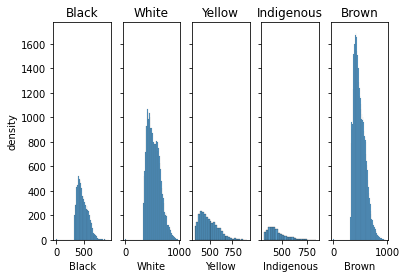

In [176]:
ploting_distribution_female_male_per_state('PB', 'NU_NOTA_MT')